<a href="https://colab.research.google.com/github/HarshaliG08/HR_Analytics_Project/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap
import os

In [67]:
# Create output directory for visualizations
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

In [68]:
# Load dataset
data = pd.read_csv('/content/People Charm case.csv')

In [69]:
# EDA
print("Dataset Info:")
data.info()

print("\nMissing Values:")
print(data.isnull().sum())

print("\nDuplicated Values:")
print(data[data.duplicated()])

data = data.drop_duplicates(keep='first')
print("\nShape after removing duplicates:", data.shape)

print("\nCorrelation:")
print(data.corr(numeric_only=True))

print("\nFirst 5 Rows of Data:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Missing Values:
satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left        

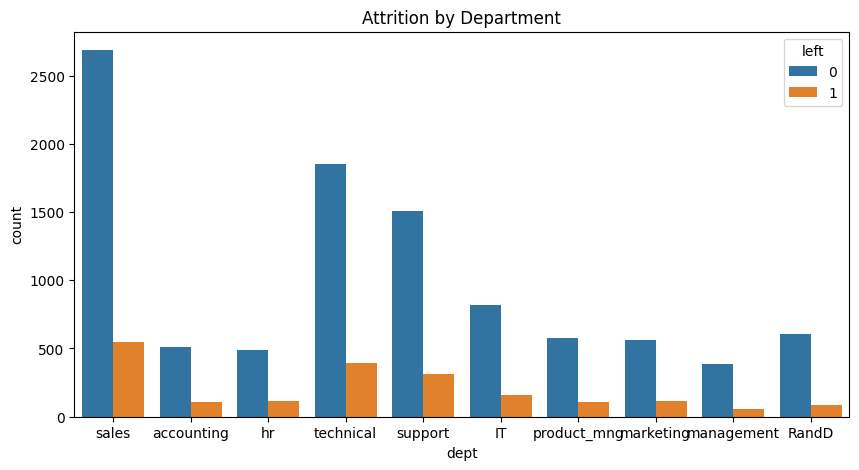

In [70]:
# Visualize attrition by department
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='dept', hue='left')
plt.title('Attrition by Department')
plt.savefig('visualizations/attrition_by_dept.png')
plt.show()
plt.close()

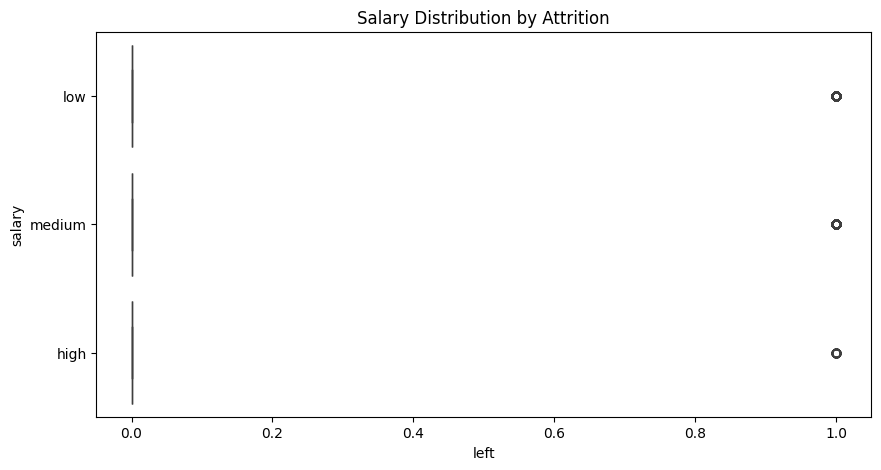

In [71]:
# Visualize salary distribution by attrition
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='left', y='salary')
plt.title('Salary Distribution by Attrition')
plt.savefig('visualizations/salary_by_attrition.png')
plt.show()
plt.close()

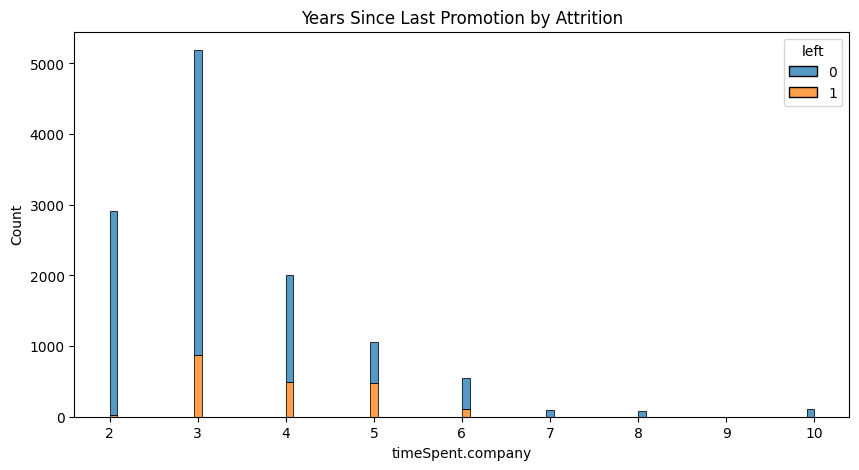

In [72]:
# Visualize years since last promotion
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='timeSpent.company', hue='left', multiple='stack')
plt.title('Years Since Last Promotion by Attrition')
plt.savefig('visualizations/years_promotion.png')
plt.show()
plt.close()

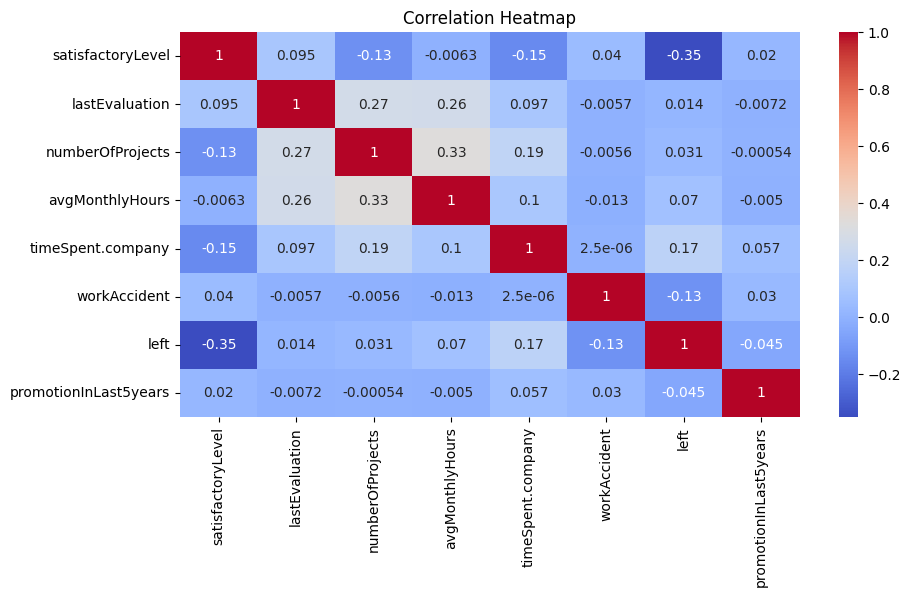

In [73]:
# Correlation heatmap
plt.figure(figsize=(10, 5))
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()
plt.close()

In [74]:
# Data Preprocessing
# Encode categorical variables
cat_cols_to_encode = ['dept', 'salary']
for col in cat_cols_to_encode:
    if col in data.columns and data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [75]:
# Define features and target
X = data.drop('left', axis=1)
y = data['left']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Scale numerical features
numeric_features_for_scaling = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features_for_scaling] = scaler.fit_transform(X_train[numeric_features_for_scaling])
X_test_scaled[numeric_features_for_scaling] = scaler.transform(X_test[numeric_features_for_scaling])

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [77]:
# Evaluate model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.show()


Model Accuracy: 0.8303459774906211

Confusion Matrix:
 [[1914   87]
 [ 320   78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      2001
           1       0.47      0.20      0.28       398

    accuracy                           0.83      2399
   macro avg       0.66      0.58      0.59      2399
weighted avg       0.79      0.83      0.80      2399



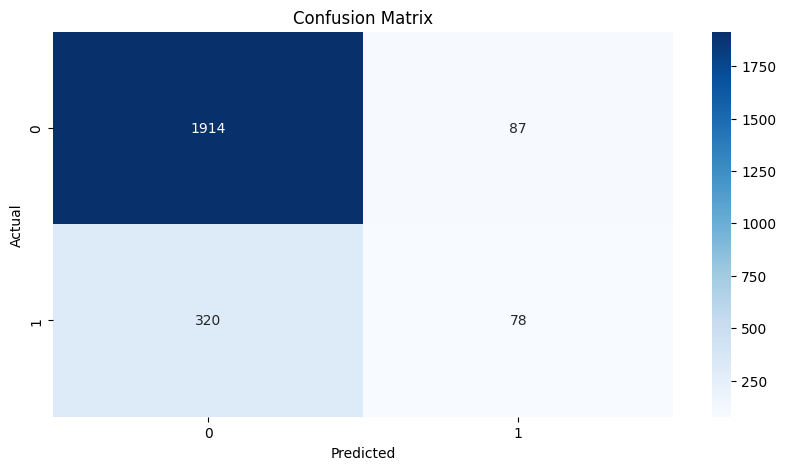

In [78]:
# Save confusion matrix as heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('visualizations/confusion_matrix.png')
plt.show()
plt.close()

In [79]:
# SHAP Analysis
# Use the scaled test data for SHAP values
explainer = shap.LinearExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

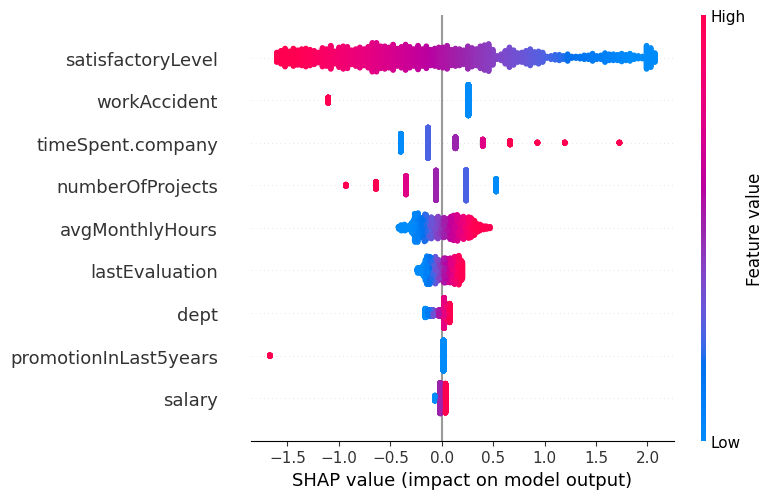

In [80]:
# Use the original X_test for feature names in the summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, show=False) # Use X_test_scaled for plotting and X_test.columns for feature names
plt.savefig('visualizations/shap_summary.png')
plt.show()
plt.close()